<a href="https://colab.research.google.com/github/AnkitBorude/DeepLearning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step

Predictions after 1000 epochs:
Input: [0. 0.] -> Predicted Output: 0.0004 (Actual: 0.0)
Input: [0. 1.] -> Predicted Output: 0.9999 (Actual: 1.0)
Input: [1. 0.] -> Predicted Output: 1.0000 (Actual: 1.0)
Input: [1. 1.] -> Predicted Output: 0.0000 (Actual: 0.0)
Input: [0. 0.] -> Predicted Output: 0.0004 (Actual: 0.0)
Input: [0. 1.] -> Predicted Output: 0.9999 (Actual: 1.0)
Input: [1. 0.] -> Predicted Output: 1.0000 (Actual: 1.0)
Input: [1. 1.] -> Predicted Output: 0.0000 (Actual: 0.0)

Final accuracy: 1.0000
Final loss: 0.0001

Final weights: [ 0.43372947 -0.795749   -0.6138609   0.8080286  -0.74818057  0.7234174
  0.94505894 -0.6629482   0.9159283   0.15841518  0.10623574 -0.04171244
 -0.16508725  0.9780324   0.85662323  0.17615479 -0.32327154  0.20928591
 -0.65220493 -0.01043707  0.00802473  0.01877342  0.11326736  1.0321559
 -0.4388212   0.6174584   0.8092896   0.09746149 -0.6214188   0.8308505
  0.7514775  -0.3657273 ]
Final bias: 0.376394718885

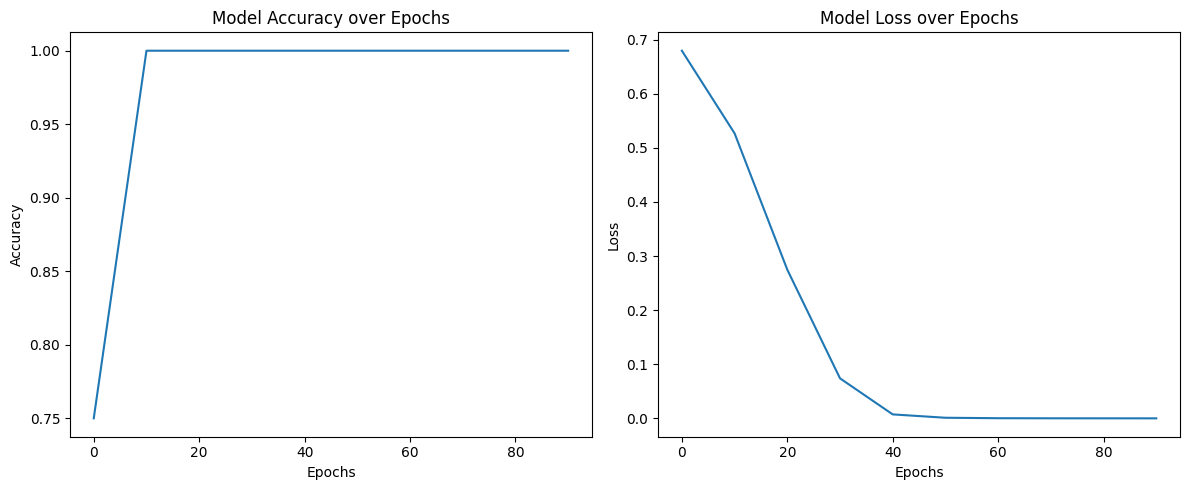

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1],[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0],[0],[1],[1],[0]], dtype=np.float32)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Custom callback to track metrics
class MetricsHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.epochs = []
        self.accuracy = []
        self.loss = []

    def on_epoch_end(self, epoch, logs={}):
        if epoch % 10 == 0:  # Record every 10 epochs
            self.epochs.append(epoch)
            self.accuracy.append(logs.get('accuracy'))
            self.loss.append(logs.get('loss'))

history_callback = MetricsHistory()

# Train the model
history = model.fit(X, y, epochs=100, verbose=0, callbacks=[history_callback])

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_callback.epochs, history_callback.accuracy)
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history_callback.epochs, history_callback.loss)
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()

# Test the model
predictions = model.predict(X)
print("\nPredictions after 1000 epochs:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Predicted Output: {predictions[i][0]:.4f} (Actual: {y[i][0]})")

# Final metrics
print(f"\nFinal accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final loss: {history.history['loss'][-1]:.4f}")

# Get weights and bias
weights, bias = model.layers[3].get_weights()
print(f"\nFinal weights: {weights.flatten()}")
print(f"Final bias: {bias[3]}")